# Interpolation

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

% matplotlib inline

## Functions

### Factor-2 Interpolation

In [2]:
def fac_2_interpolator(xu):
    x_axis = len(xu)
    #y = [xu[0]+0.5*xu[1]]
    xu = xu+[0]
    y = [xu[n]+0.5*(xu[n-1]+xu[n+1]) for n in range(0,x_axis)]
    #y.append(xu[-1]+0.5*xu[-2])
    return y

### Factor-3 Interpolation

In [3]:
def fac_3_interpolator(xu):
    x_axis = len(xu)
    xu = xu+[0, 0]
    y = [xu[n]+(2/3)*(xu[n-1]+xu[n+1])+(1/3)*(xu[n-2]+xu[n+2]) for n in range(0,x_axis)]
    return y

### Padding

In [4]:
def find_xu(x, order):
    return [x[n//order] if n%order == 0 else 0 for n in range(order*len(x))]

### RMSE Error

In [2]:
def error_mse(x, y):
    d = x-y
    s = sum([i*i for i in d])/len(x)
    return s

### Testing with example in class

In [6]:
x = [0,1,2,3,4,3]

In [7]:
xu = find_xu(x, 2)
xu

[0, 0, 1, 0, 2, 0, 3, 0, 4, 0, 3, 0]

In [8]:
fac_2_interpolator(xu)

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 3.5, 3.0, 1.5]

## For sin signal

Frequency of 10Hz

In [9]:
fs = 10
t = np.linspace(0,1/fs,11)[:-1]

Sin with 10 Samples/Cycle

In [10]:
x = np.sin(2*pi*fs*t)

10 Samples/cycle plot

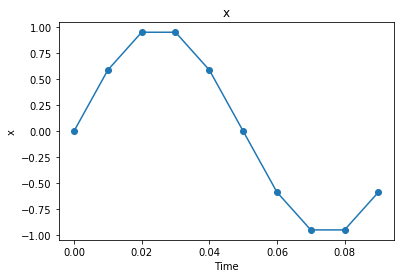

In [11]:
plt.plot(t, x, '-o')
plt.title('x')
plt.xlabel('Time')
plt.ylabel('x')
plt.show()

Padding with zeros and creating a list of new times

In [12]:
xu_2 = find_xu(x, 2)
fs_2 = 20
t_2 = np.linspace(0,1/fs,21)[:-1]

Finding Y

In [13]:
y_2 = fac_2_interpolator(xu_2)

Plotting Y

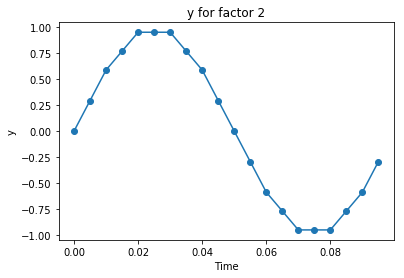

In [14]:
plt.plot(t_2, y_2, '-o')
plt.title('y for factor 2')
plt.xlabel('Time')
plt.ylabel('y')
plt.show()

Comparing y with x

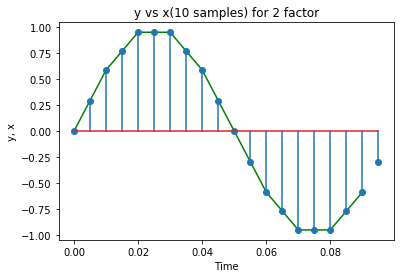

In [15]:
plt.plot(t, x, 'g')
plt.stem(t_2, y_2)
plt.title('y vs x(10 samples) for 2 factor')
plt.xlabel('Time')
plt.ylabel('y, x')
plt.show()

true 20 sampled signal

In [16]:
x_2 = np.sin(2*pi*fs*t_2)

Comparing True signal with y

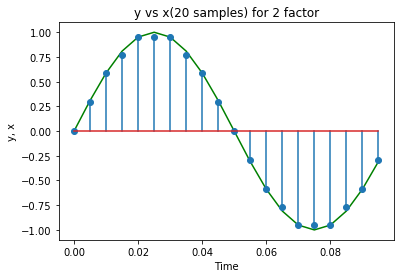

In [17]:
plt.plot(t_2, x_2, 'g')
plt.stem(t_2, y_2)
plt.title('y vs x(20 samples) for 2 factor')
plt.xlabel('Time')
plt.ylabel('y, x')
plt.show()

MSE of Factor-2

In [18]:
mse_2 = error_mse(y_2, x_2)

In [19]:
print('MSE of Factor-2 Interpolation is:', mse_2)

MSE of Factor-2 Interpolation is: 0.000598866149292


### Factor-3 Interpolation

Padding x by 2 zeros and creating new time axis

In [20]:
xu_3 = find_xu(x, 3)
fs_3 = 30
t_3 = np.linspace(0,1/fs,31)[:-1]

Y for factor-3 interpolation

In [21]:
y_3 = fac_3_interpolator(xu_3)

Comparing Y with x

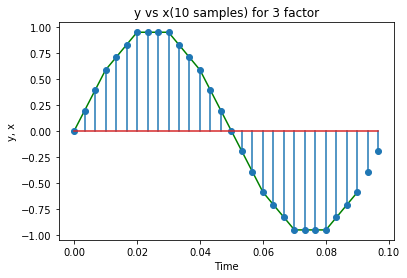

In [22]:
plt.plot(t, x, 'g')
plt.stem(t_3, y_3)
plt.title('y vs x(10 samples) for 3 factor')
plt.xlabel('Time')
plt.ylabel('y, x')
plt.show()

True signal with 30 Samples

In [23]:
x_3 = np.sin(2*pi*fs*t_3)

Comparing True signal with y

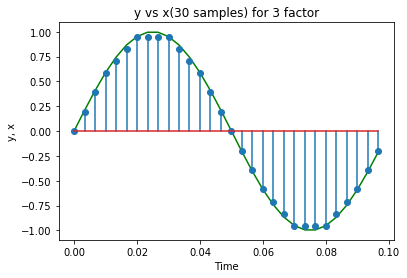

In [24]:
plt.plot(t_3, x_3, 'g')
plt.stem(t_3, y_3)
plt.title('y vs x(30 samples) for 3 factor')
plt.xlabel('Time')
plt.ylabel('y, x')
plt.show()

MSE of Factor-3

In [25]:
mse_3 = error_mse(y_3, x_3)

In [26]:
print('MSE of Factor-3 Interpolation is:', mse_3)

MSE of Factor-3 Interpolation is: 0.00063051936439


In [31]:
def mse_variation(vary, fs = 10, f = 10, n = 50):
    
    if isinstance(fs, int) and vary == 'Frequency':
        fs = [fs for i in range(n)]
    elif isinstance(fs, (list, tuple)) and len(fs)==2 and vary == 'Samples':
        fs = np.arange(fs[0], fs[1])
    else:
        print('Provide proper sampling frequency: list or tuple (if samples are varying), int(if frequency is varying)')
        return
    
    if isinstance(f, (int, float)) and vary == 'Samples':
        f = [f for i in fs]
    elif isinstance(f, (list, tuple)) and len(f)==2 and vary == 'Frequency':
        f = np.linspace(f[0], f[1], n)
    else:
        print('Provide proper sampling frequency: list or tuple (if samples are varying), int(if frequency is varying)')
        return
        
    t = [np.linspace(0, 1/f[i], fs[i]+1)[:-1] for i in range(len(fs))]
    t_2 = [np.linspace(0, 1/f[i], 2*fs[i]+1)[:-1] for i in range(len(fs))]
    t_3 = [np.linspace(0, 1/f[i], 3*fs[i]+1)[:-1] for i in range(len(fs))]
    
    x_sin = [np.sin(2*pi*t[i]*f[i]) for i in range(len(t))]
    x_2 = [np.sin(2*pi*t_2[i]*f[i]) for i in range(len(t_2))]
    x_3 = [np.sin(2*pi*t_3[i]*f[i]) for i in range(len(t_3))]
    
    y_2 = [fac_2_interpolator(find_xu(i, 2)) for i in x_sin]
    y_3 = [fac_3_interpolator(find_xu(i, 3)) for i in x_sin]
    
    mse_2 = [error_mse(x_2[i], y_2[i]) for i in range(len(x_2))]
    mse_3 = [error_mse(x_3[i], y_3[i]) for i in range(len(x_3))]
    
    if vary == 'Samples':
        plt.plot(fs, mse_2, fs, mse_3)
    else:
        plt.plot(f, mse_2, f, mse_3)
    plt.legend(['factor-2', 'factor-3'])
    #plt.figure(figsize=(15,10))
    #plt.ylim(0.0001, 0.001)
    
    return 

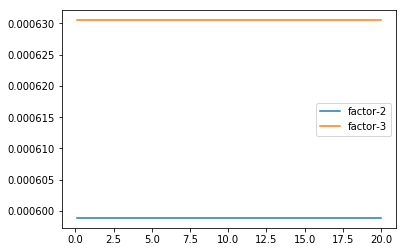

In [32]:
mse_variation(fs = 10, f = (0.1, 20), vary = 'Frequency')

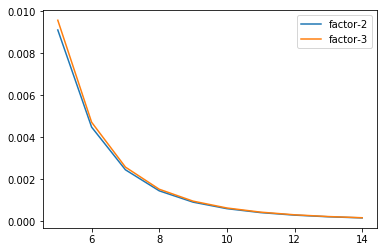

In [33]:
mse_variation(fs = (5, 15), f = 10, vary = 'Samples')

## Generalized Interpolation

In [3]:
def general_interpolation(M, N, f = 10, cycles = 1, plot = True):
    
    t_m_one = np.linspace(0,1/f,M+1)[:-1]
    t_n_one = np.linspace(0,1/f,N+1)[:-1]
    t_m = []
    t_n = []
    for i in range(cycles):
        t_m = np.append(t_m, t_m_one)
        t_n = np.append(t_n, t_n_one)
        
    x_n = np.sin(2*pi*t_n*f)
    x = np.sin(2*pi*t_m*f)
    
    y = [y_n(x, n, N, M) for n in range(N)]
    if plot:
        plt.stem(t_n, y)
        plt.plot(t_n, x_n, 'g')
    return error_mse(x_n, y)

In [4]:
def y_n(x,n,N,M):
    i = n*M/N
    if int(i) == i:
        return x[int(i)]
    else:
        int_i = int(i)
        if int_i+1 != len(x):
            return x[int_i]-(x[int_i]-x[int_i+1])*(i-int_i)
        else:
            return x[int_i]-(x[int_i])*(i-int_i)


0.00030895469291671777

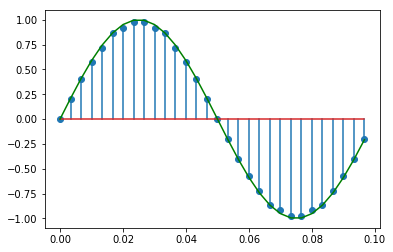

In [5]:
general_interpolation(12,30)

### Varying Params of Generalised Interpolation

In [6]:
def varying_params(f = None, M = None, N = None, vary = 'N'):
    if vary == 'N':
        N = range(M, 2*M)
        err_N = [general_interpolation(M,i, plot = False) for i in N]
        plt.plot(N, err_N, '-o')
        plt.ylabel('MSE Error')
        plt.xlabel('N for M = '+str(M))
    if vary == 'M':
        M = range(1, N)
        err_M = [general_interpolation(i, N, plot = False) for i in M]
        plt.plot(M, err_M, '-o')
        plt.ylabel('MSE Error')
        plt.xlabel('M for N = '+str(N))
    if vary == 'F':
        F = range(1, 20)
        err_F = [general_interpolation(M, N, f=i, plot = False) for i in F]
        plt.plot(F, err_F, '-o')
        plt.ylabel('MSE Error')
        plt.xlabel('F for M = '+str(M)+', N = '+str(N))
    return

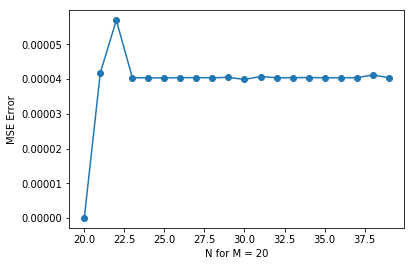

In [7]:
varying_params(f = 10, M = 20, vary = 'N')

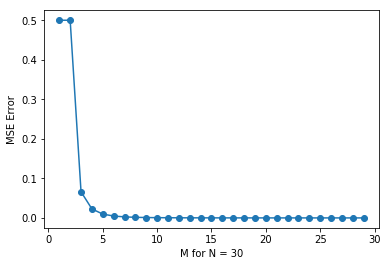

In [8]:
varying_params(f = 10, N = 30, vary = 'M')

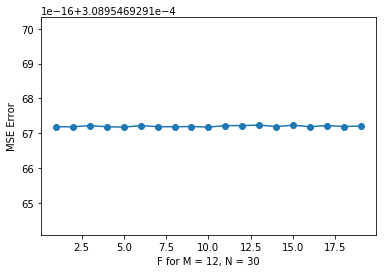

In [9]:
varying_params(M =12, N = 30, vary = 'F')